<!-- # Can we predict the financial loss ($M) of a cyberattack using factors such as attack method, data breached, and response time?

# https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024/data -->

Can we predict the financial loss ($M) of a cyberattack using factors such as attack method, data breached, and response time?

https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024/data


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Global_Cybersecurity_Threats_2015-2024.csv")
df

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
...,...,...,...,...,...,...,...,...,...,...
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9


In [3]:
df.isna().any()

Country                                False
Year                                   False
Attack Type                            False
Target Industry                        False
Financial Loss (in Million $)          False
Number of Affected Users               False
Attack Source                          False
Security Vulnerability Type            False
Defense Mechanism Used                 False
Incident Resolution Time (in Hours)    False
dtype: bool

In [4]:
(df == 0).any()

Country                                False
Year                                   False
Attack Type                            False
Target Industry                        False
Financial Loss (in Million $)          False
Number of Affected Users               False
Attack Source                          False
Security Vulnerability Type            False
Defense Mechanism Used                 False
Incident Resolution Time (in Hours)    False
dtype: bool

<Axes: >

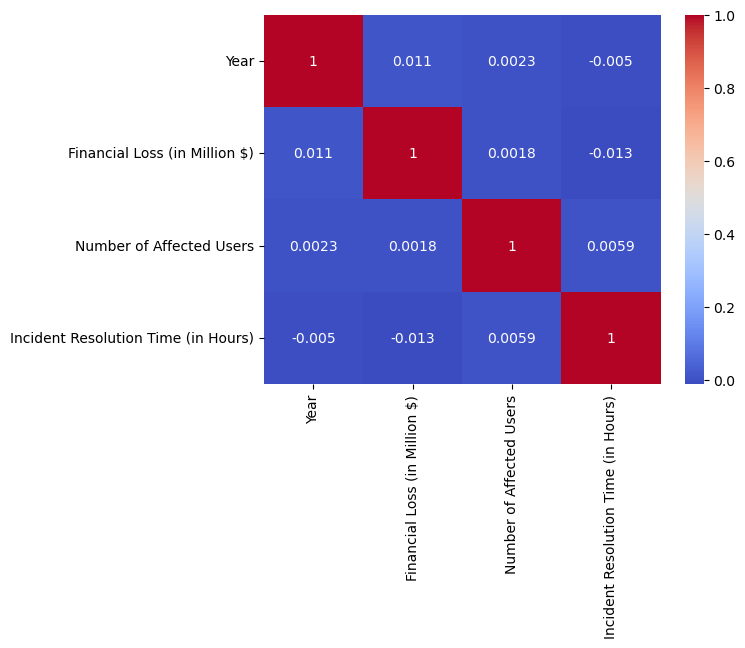

In [5]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm') 

In [6]:
df.groupby("Attack Type")['Financial Loss (in Million $)'].mean().sort_values()



Attack Type
Malware              49.418454
Ransomware           49.653793
SQL Injection        50.013042
Phishing             50.459905
Man-in-the-Middle    51.309085
DDoS                 52.035631
Name: Financial Loss (in Million $), dtype: float64

In [7]:
df.groupby("Country")['Financial Loss (in Million $)'].mean().sort_values()


Country
India        47.292597
China        48.805943
France       49.089443
Japan        49.827344
Russia       49.948237
Brazil       50.911677
UK           51.411184
USA          51.610174
Australia    51.861953
Germany      54.272302
Name: Financial Loss (in Million $), dtype: float64

In [8]:
df.groupby("Target Industry")['Financial Loss (in Million $)'].mean().sort_values()


Target Industry
Education             47.903174
Healthcare            49.047296
Retail                49.928014
Telecommunications    50.766973
Banking               51.173910
IT                    51.903410
Government            52.618685
Name: Financial Loss (in Million $), dtype: float64

In [9]:
df.groupby("Security Vulnerability Type")['Financial Loss (in Million $)'].mean().sort_values()

Security Vulnerability Type
Unpatched Software    50.168604
Zero-day              50.380306
Weak Passwords        50.519726
Social Engineering    50.905676
Name: Financial Loss (in Million $), dtype: float64

In [10]:
df.groupby("Attack Source")['Financial Loss (in Million $)'].mean().sort_values()


Attack Source
Insider         48.767965
Unknown         50.534648
Nation-state    51.004055
Hacker Group    51.745729
Name: Financial Loss (in Million $), dtype: float64

In [11]:
df.groupby("Defense Mechanism Used")['Financial Loss (in Million $)'].mean().sort_values()

Defense Mechanism Used
Firewall              49.719709
VPN                   50.209673
AI-based Detection    50.361527
Encryption            50.400203
Antivirus             51.698838
Name: Financial Loss (in Million $), dtype: float64

In [12]:
np.log(df["Number of Affected Users"])

0       13.558253
1       12.597983
2       13.314462
3       13.398964
4       13.605631
          ...    
2995    12.158425
2996    13.702166
2997    13.507268
2998    12.847805
2999    13.083589
Name: Number of Affected Users, Length: 3000, dtype: float64